# Uber Analysis

Dataset content: Geography(USA,Srilanka and Pakistan). One year. Total number of drives, miles travelled, start location, end location, purpose of the drives, start date and end data.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, time

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading Dataset
df = pd.read_csv("My Uber Drives - 2016.csv")
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


### Cleaning Dataset

In [3]:
#Removing '*' from column names
df.columns = df.columns.str.replace("*","")

In [4]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
#Gathering info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
#Checking shape of dataset
df.shape

(1156, 7)

In [7]:
#Checking statistics of dataset
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [8]:
#Checking for total null values
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

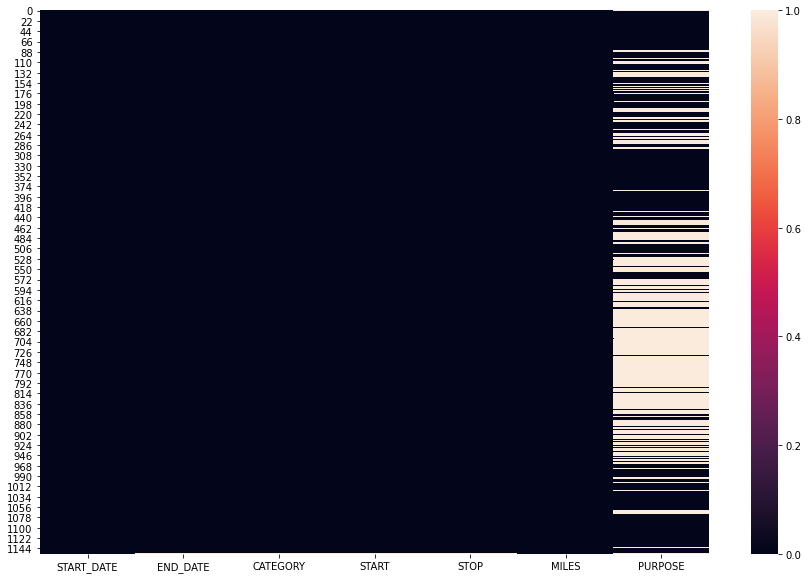

In [9]:
#Plotting null values for better understanding
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [10]:
#Droping rows having 'END_DATE','CATEGORY','START','STOP' columns with null values
df.dropna(axis=0, subset=['END_DATE','CATEGORY','START','STOP'], how='all', inplace=True)

In [11]:
#Again checking for total null values
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [12]:
#Checking for percentage of null values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

START_DATE     0.000000
END_DATE       0.000000
CATEGORY       0.000000
START          0.000000
STOP           0.000000
MILES          0.000000
PURPOSE       43.463203
dtype: float64

In [13]:
#To not loose anymore data using forward fill(ffill) method 
df['PURPOSE'].fillna(method='ffill', inplace=True)

In [14]:
#Again checking for total null values
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [15]:
#Changing data type of 'START_DATE' and 'END_DATE' columns to datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [16]:
#Now we can see for 'START_DATE' and 'END_DATE' columns datatype is change to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


### Data Analysis

In [17]:
#Checking for number of categories available
category = pd.crosstab(index = df['CATEGORY'], columns = 'Count of Records')
category

col_0,Count of Records
CATEGORY,
Business,1078
Personal,77


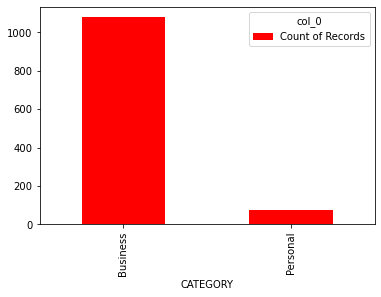

In [18]:
#Plotting category to understand variations in categories
category.plot(kind="bar", color="r")

In [19]:
#Finding from where we are getting lot of bookings
start_point = df.START.value_counts()
start_point

Cary                         201
Unknown Location             148
Morrisville                   85
Whitebridge                   68
Islamabad                     57
                            ... 
West End                       1
Georgian Acres                 1
Jackson Heights                1
Arlington Park at Amberly      1
Long Island City               1
Name: START, Length: 177, dtype: int64

In [20]:
#Top 10 locations from where we are getting lot of bookings
start_point.head(10)

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Name: START, dtype: int64

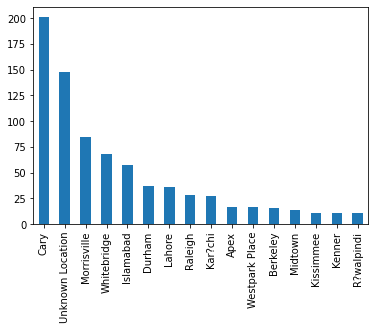

In [21]:
#Which are the locations where users have booked more than 10 number of times
start_point[start_point>10].plot(kind="bar")

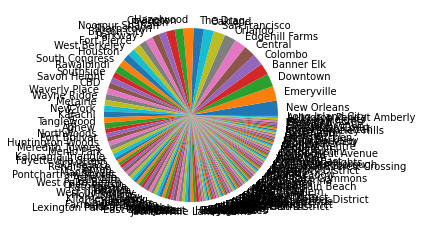

In [22]:
#Which are the locations where users have booked less than and equal to 10 number of times
start_point[start_point<=10].plot(kind="pie")

In [23]:
#Finding to where most people are travelling/going
stop_point = df.STOP.value_counts()
stop_point

Cary                       203
Unknown Location           149
Morrisville                 84
Whitebridge                 65
Islamabad                   58
                          ... 
Depot Historic District      1
Wake Co.                     1
Isles of Buena Vista         1
University District          1
Chalmette                    1
Name: STOP, Length: 188, dtype: int64

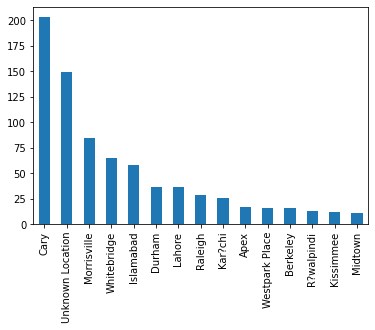

In [24]:
#Which are the locations where users have stopped more than 10 number of times
stop_point[stop_point>10].plot(kind="bar")

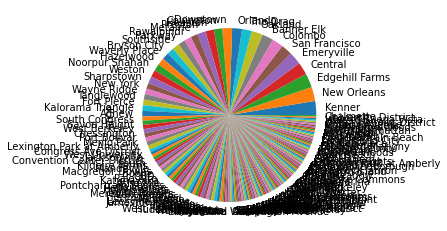

In [25]:
#Which are the locations where users have stopped less than and equal to 10 number of times
stop_point[stop_point<=10].plot(kind="pie")

In [26]:
#Finding how much miles people are travelling most of the time
miles = df.MILES.value_counts()
miles

9.9      28
3.1      26
2.1      19
10.4     19
2.5      19
         ..
310.3     1
11.1      1
10.7      1
195.6     1
22.7      1
Name: MILES, Length: 256, dtype: int64

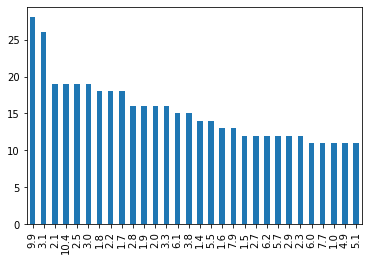

In [27]:
#Finding what are the miles people are most likely travelling more than 10 times
miles[miles>10].plot(kind="bar")

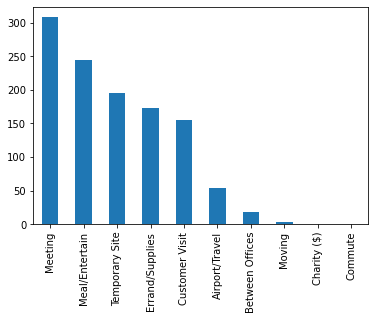

In [28]:
#Finding for what purpose people are mostly taking UBER
#Way1
df.PURPOSE.value_counts().plot(kind="bar")

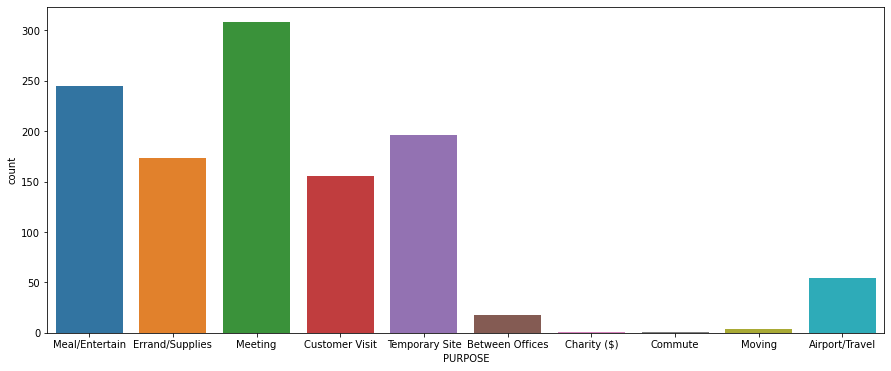

In [29]:
#Finding for what purpose people are mostly taking UBER
#Way2
plt.figure(figsize = (15, 6))
sns.countplot(df['PURPOSE'])

In [30]:
#Creating new column as 'minutes' in dataframe to calculate the time of journey
df['minutes'] = df.END_DATE-df.START_DATE
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,01:07:00


In [31]:
#Converting all values of 'minutes' column into minutes
df['minutes'] = df['minutes'].dt.total_seconds()/60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

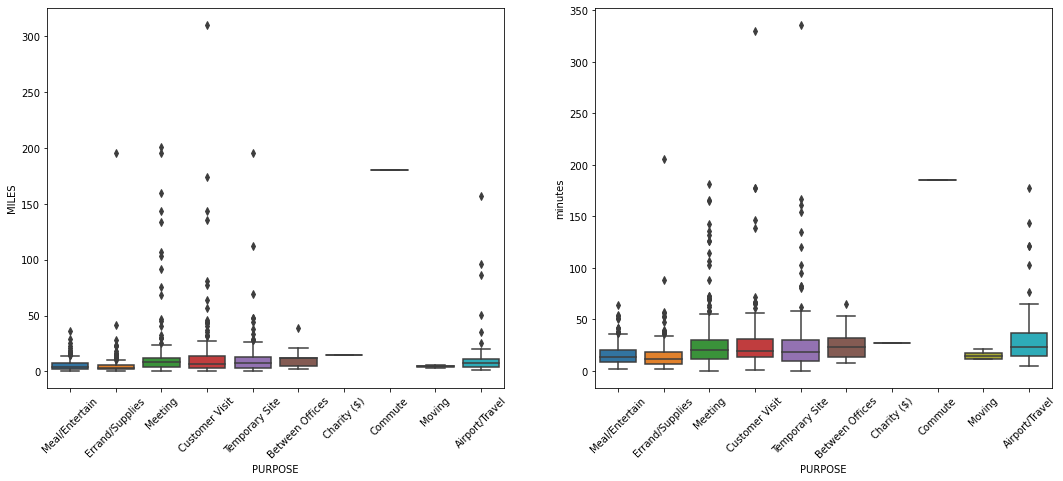

In [32]:
#Plotting and comparing 'MILES' & 'minutes' with respect to 'PURPOSE'
plt.figure(figsize = (18,7)) #defining size for both plots
plt.subplot(1,2,1) #subplotting first graph for comparison purpose
sns.boxplot(data = df, x = df.PURPOSE, y = df.MILES) #plotting first graph for 'MILES' with respect to 'PURPOSE'
plt.xticks(rotation = 45) #rotating labels for visibility
plt.subplot(1,2,2) #subplotting second graph for comparison purpose
sns.boxplot(data = df, x = df.PURPOSE, y = df.minutes) #plotting first graph for 'minutes' with respect to 'PURPOSE'
plt.xticks(rotation = 45) #rotating labels for visibility

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

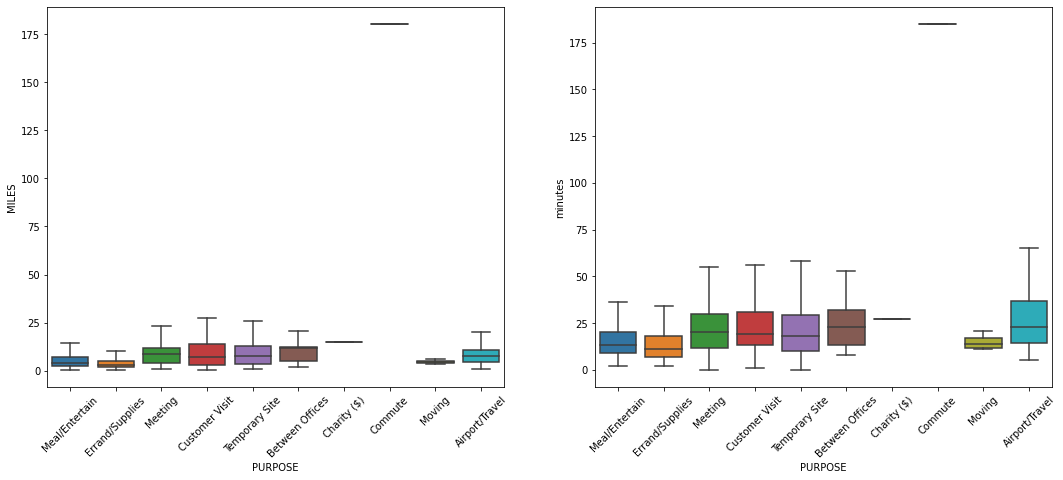

In [33]:
#Plotting and comparing 'MILES' & 'minutes' with respect to 'PURPOSE' without outliers
plt.figure(figsize = (18,7)) 
plt.subplot(1,2,1) 
sns.boxplot(data = df, x = df.PURPOSE, y = df.MILES, showfliers = False) #'showfliers' attribute to avoid outliers
plt.xticks(rotation = 45) 
plt.subplot(1,2,2) 
sns.boxplot(data = df, x = df.PURPOSE, y = df.minutes, showfliers = False) #'showfliers' attribute to avoid outliers
plt.xticks(rotation = 45) 

In [34]:
#Finding Mean, Min, Max miles travelled with respect to each purpose
pd.DataFrame({'Mean':df.groupby(['PURPOSE'])['MILES'].mean(), 'Min':df.groupby(['PURPOSE'])["MILES"].min(), 'Max':df.groupby(['PURPOSE'])["MILES"].max()})

,Mean,Min,Max
PURPOSE,,,
Airport/Travel,14.953704,0.9,156.9
Between Offices,10.944444,1.9,39.2
Charity ($),15.100000,15.1,15.1
Commute,180.200000,180.2,180.2
Customer Visit,16.065806,0.6,310.3
Errand/Supplies,5.928902,0.5,195.3
Meal/Entertain,5.773878,0.6,36.5
Meeting,12.652597,0.7,201.0
Moving,4.550000,3.3,6.1
